In [12]:
%cd ./Stanage/users/acp21rjf/long-context-asr/eval/results

/home/robertflynn/Stanage/users/acp21rjf/long-context-asr/eval/results


In [13]:
!ls

evals.csv


In [68]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [19]:
csv = pd.read_csv('evals.csv', sep=',')

In [81]:
seq_lens = [2048, 4096, 8192, 16384, 32768, 360000]

In [91]:
out_data_wd = {}
out_data_rb = {}
for seq_len in seq_lens:
    sset = csv.loc[csv['dataset'] == 'earnings22'].loc[csv['split'] == 'test'].loc[csv['seq_len'] == seq_len]
    wdsset = sset.loc[sset['name'].str.startswith('w')]
    out_data_wd[seq_len] = {'wer': wdsset['wer'].mean(), 'std': wdsset['wer'].std()}
    rbset = sset.loc[sset['name'].str.startswith('rb')]
    out_data_rb[seq_len] = {'wer': rbset['wer'].mean(), 'std': rbset['wer'].std()}

In [93]:
out_data_wd

{2048: {'wer': 0.1946231508145606, 'std': 0.00289787091969043},
 4096: {'wer': 0.191580036626296, 'std': 0.0007140470152401878},
 8192: {'wer': 0.18826460796928288, 'std': 0.003558102729328109},
 16384: {'wer': 0.18548019252632938, 'std': 0.0022391863399718087},
 32768: {'wer': 0.18906793565209098, 'std': 0.00413608275675701},
 360000: {'wer': 0.18850288312943783, 'std': 0.0005268071025646326}}

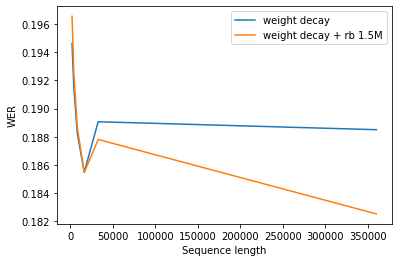

In [94]:
# log scale x axis:

plt.plot(seq_lens, [out_data_wd[seq_len]['wer'] for seq_len in seq_lens], label='weight decay')
plt.plot(seq_lens, [out_data_rb[seq_len]['wer'] for seq_len in seq_lens], label='weight decay + rb 1.5M')
plt.legend()
plt.xlabel('Sequence length')
plt.ylabel('WER')
plt.show()